<a href="https://colab.research.google.com/github/ravijp/WiDS/blob/main/WiDS_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 5.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=17afc809188cf0a43a75041f342b776f38eb47a20ca1f31a1d9dd9f22bc3277c
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


# Setup Colab for kaggle

In [2]:
import json
from pathlib import Path
import shutil
import subprocess
import sys
import os
from google.colab import data_table
data_table.enable_dataframe_formatter()
# # data_table.disable_dataframe_formatter()

INPUT_FOLDER = Path("/kaggle/input/widsdatathon2022/")
OUTPUT_FOLDER = Path("/kaggle/output/")
WORK_FOLDER = Path("/kaggle/working/")

def install_package(package_name):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

def dump_dataset_metadata(user_name, dataset_name, folder_path):
    with open(Path(folder_path) / "dataset-metadata.json", "w") as f:
        json.dump({
            "title": dataset_name,
            "id": f"{user_name}/{dataset_name}",
            "licenses": [{ "name": "CC0-1.0" }]
        }, f, indent=4)

def is_running_in_colab(check_env=True):
    if not check_env:
        return True
    running_in_colab = "google.colab" in str(get_ipython())
    print(f"Running in Colab: {running_in_colab}")
    return running_in_colab

def setup_colab_drive_for_kaggle(check_env=True):
    if not is_running_in_colab(check_env):
        return False

    from google.colab import drive
    drive.mount("/content/drive")

    return True  # Is Colab

def setup_colab_secrets_for_kaggle(check_env=True):
    if not is_running_in_colab(check_env):
        return False

    drive_sources_dir = Path("/content/drive/MyDrive/kaggle")

    # Set up kaggle.json to access Kaggle data.
    if (drive_sources_dir / "kaggle.json").exists():
        print(f'kaggle.json file found at {drive_sources_dir / "kaggle.json"}')
        kaggle_config = Path.home() / ".kaggle"
        if kaggle_config.exists():
            shutil.rmtree(kaggle_config)
        kaggle_config.mkdir()
        (kaggle_config / "kaggle.json").symlink_to(drive_sources_dir / "kaggle.json")
        print(f"Content of Kaggle config dir ({kaggle_config}): {list(map(str, kaggle_config.iterdir()))}")

    if (drive_sources_dir / ".env").exists():
        install_package("python-dotenv")
        from dotenv import load_dotenv, dotenv_values
        load_dotenv(dotenv_path=drive_sources_dir / ".env", verbose=True, override=True)
        nonempty_keys = [key for key, val in dotenv_values(drive_sources_dir / '.env').items() if val]
        print(f"Loaded environment variables from .env file: {nonempty_keys}.")

    return True  # Is Colab

def setup_colab_directories_for_kaggle(check_env=True, local_working=False):
    if not is_running_in_colab(check_env):
        return False

    # Only add "working" directory if it was requested to be mapped in Drive, not in local env.
    target_content_dirs = ["input", "output"] + ([] if local_working else ["working"])

    drive_content_dir = Path("/content/drive/MyDrive/kaggle")
    # Make sure directories are present in Drive
    drive_content_dir.mkdir(exist_ok=True)
    for content_dir in target_content_dirs:
        (drive_content_dir / content_dir).mkdir(exist_ok=True)
    print(f"Content of Drive Kaggle data dir ({drive_content_dir}): {list(map(str, drive_content_dir.iterdir()))}")

    kaggle_dir = Path("/kaggle")
    if kaggle_dir.exists():
        shutil.rmtree(kaggle_dir)
    kaggle_dir.mkdir()

    for content_dir in target_content_dirs:
        (kaggle_dir / content_dir).symlink_to(drive_content_dir / content_dir)

    # It was requested not to map working to Drive, so create it locally.
    if local_working:
        (kaggle_dir / "working").mkdir()

    print(f"Content of Kaggle data dir ({kaggle_dir}): {list(map(str, kaggle_dir.iterdir()))}")
    for content_dir in target_content_dirs + (["working"] if local_working else []):
        print(f"Content of Kaggle data subdir ({kaggle_dir / content_dir}): {list(map(str, (kaggle_dir / content_dir).iterdir()))}")

    return True  # Is Colab

def setup_colab_for_kaggle(check_env=True, local_working=False):
    if not is_running_in_colab(check_env):
        return False

    setup_colab_drive_for_kaggle(check_env=False)
    setup_colab_directories_for_kaggle(check_env=False, local_working=local_working)
    setup_colab_secrets_for_kaggle(check_env=False)

    return True  # Is Colab


In [3]:
import traceback
try:
    from google.colab import drive
    drive.mount("/content/drive")
    %cd /content/drive/MyDrive/Colab\ Notebooks
    setup_colab_for_kaggle(check_env=False, local_working=True)
except Exception as e:
    tb = traceback.format_exc()
    print("Not in Colab", tb)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Content of Drive Kaggle data dir (/content/drive/MyDrive/kaggle): ['/content/drive/MyDrive/kaggle/kaggle.json', '/content/drive/MyDrive/kaggle/.ipynb_checkpoints', '/content/drive/MyDrive/kaggle/input', '/content/drive/MyDrive/kaggle/output']
Content of Kaggle data dir (/kaggle): ['/kaggle/working', '/kaggle/input', '/kaggle/output']
Content of Kaggle data subdir (/kaggle/input): ['/kaggle/input/widsdatathon2022', '/kaggle/input/.ipynb_checkpoints']
Content of Kaggle data subdir (/kaggle/output): ['/kaggle/output/.ipynb_checkpoints']
Content of Kaggle data subdir (/kaggle/working): []
kaggle.json file found at /content/drive/MyDrive/kaggle/kaggle.json
Content of Kaggle config dir (/root/.kaggle): ['/root/.kaggle/kaggle.json']


# Download Competition files

Location : /kaggle/input/widsdatathon2022 folder. 

In [4]:
!kaggle competitions files widsdatathon2022

name                 size  creationDate         
-------------------  ----  -------------------  
train.csv            26MB  2021-12-16 19:06:07  
sample_solution.csv  95KB  2021-12-16 19:06:07  
test.csv              3MB  2021-12-16 19:06:07  


In [5]:
!kaggle competitions download widsdatathon2022  -p /kaggle/input/widsdatathon2022/

  0% 0.00/1.82M [00:00<?, ?B/s]
100% 1.82M/1.82M [00:00<00:00, 55.1MB/s]


In [12]:
chd = os.getcwd()
os.chdir(INPUT_FOLDER)
!unzip widsdatathon2022.zip
!rm widsdatathon2022.zip

# !unzip test.csv.zip
# !rm test.csv.zip
# !unzip train.csv.zip
# !rm train.csv.zip 
os.chdir(chd)

Archive:  widsdatathon2022.zip
replace sample_solution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_solution.csv     
  inflating: test.csv                
  inflating: train.csv               
unzip:  cannot find or open test.csv.zip, test.csv.zip.zip or test.csv.zip.ZIP.
rm: cannot remove 'test.csv.zip': No such file or directory
unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.
rm: cannot remove 'train.csv.zip': No such file or directory


In [13]:
os.chdir("/content/drive/MyDrive/kaggle")
os.chdir(chd)
print(os.getcwd())

/content/drive/MyDrive/kaggle/input/widsdatathon2022


In [14]:
# !git init
# !ls -a
# !rm -rf .git

# Modelling

Kaggle kernel code

## Imports

In [4]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
pd.options.display.max_columns=100
pd.options.display.max_rows=100


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/widsdatathon2022/train_edd.csv
/kaggle/input/widsdatathon2022/test_edd.csv
/kaggle/input/widsdatathon2022/sample_solution.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/train.csv


## EDA

In [61]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [62]:
df_train=pd.read_csv('/kaggle/input/widsdatathon2022/train.csv')

df_test=pd.read_csv('/kaggle/input/widsdatathon2022/test.csv')
df_train = reduce_mem_usage(df_train)
df_test = reduce_mem_usage(df_test)

print(len(df_train), len(df_test))
print("NULL Values:>\n")
print(df_train.isnull().mean())
print(df_train['site_eui'].describe())
print("df_train['Year_Factor'].value_counts():> \n", df_train['Year_Factor'].value_counts())
print("df_test['Year_Factor'].value_counts():> \n", df_test['Year_Factor'].value_counts())
print("df_test.isnull().mean():> \n", df_test.isnull().mean())

Memory usage of dataframe is 36.99 MB
Memory usage after optimization is: 7.16 MB
Decreased by 80.7%
Memory usage of dataframe is 4.66 MB
Memory usage after optimization is: 0.87 MB
Decreased by 81.3%
75757 9705
NULL Values:>

Year_Factor                  0.000000
State_Factor                 0.000000
building_class               0.000000
facility_type                0.000000
floor_area                   0.000000
year_built                   0.024249
energy_star_rating           0.352561
ELEVATION                    0.000000
january_min_temp             0.000000
january_avg_temp             0.000000
january_max_temp             0.000000
february_min_temp            0.000000
february_avg_temp            0.000000
february_max_temp            0.000000
march_min_temp               0.000000
march_avg_temp               0.000000
march_max_temp               0.000000
april_min_temp               0.000000
april_avg_temp               0.000000
april_max_temp               0.000000
may_min_temp 

In [63]:
data_table.DataTable(df_train, max_columns=100, max_rows=6)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.400391,36,50.5000,68,35,50.59375,73,40,53.68750,80,41,55.50000,78,46,56.84375,84,50,60.50000,90,52,62.71875,84,52,62.15625,85,52,64.62500,90,47,63.03125,83,43,53.81250,72,36,49.281250,71,115,2960,16.59375,0.000000,0,56.96875,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.625000,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.799805,36,50.5000,68,35,50.59375,73,40,53.68750,80,41,55.50000,78,46,56.84375,84,50,60.50000,90,52,62.71875,84,52,62.15625,85,52,64.62500,90,47,63.03125,83,43,53.81250,72,36,49.281250,71,115,2960,16.59375,0.000000,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500000,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.799805,36,50.5000,68,35,50.59375,73,40,53.68750,80,41,55.50000,78,46,56.84375,84,50,60.50000,90,52,62.71875,84,52,62.15625,85,52,64.62500,90,47,63.03125,83,43,53.81250,72,36,49.281250,71,115,2960,16.59375,0.000000,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.687500,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.799805,36,50.5000,68,35,50.59375,73,40,53.68750,80,41,55.50000,78,46,56.84375,84,50,60.50000,90,52,62.71875,84,52,62.15625,85,52,64.62500,90,47,63.03125,83,43,53.81250,72,36,49.281250,71,115,2960,16.59375,0.000000,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406250,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.400391,36,50.5000,68,35,50.59375,73,40,53.68750,80,41,55.50000,78,46,56.84375,84,50,60.50000,90,52,62.71875,84,52,62.15625,85,52,64.62500,90,47,63.03125,83,43,53.81250,72,36,49.281250,71,115,2960,16.59375,0.000000,0,56.96875,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.898438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.593750,28,43.4375,56,34,47.68750,64,35,49.34375,71,40,56.28125,89,45,59.18750,88,47,63.56250,91,54,66.93750,87,52,68.62500,91,44,61.37500,79,39,55.40625,68,40,51.28125,71,24,38.531250,51,260,3772,45.03125,1.400391,1,55.15625,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,132.875000,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.593750,28,43.4375,56,34,47.68750,64,35,49.34375,71,40,56.28125,89,45,59.18750,88,47,63.56250,91,54,66.93750,87,52,68.62500,91,44,61.37500,79,39,55.40625,68,40,51.28125,71,24,38.531250,51,260,3772,45.03125,1.400391,1,55.15625,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,39.468750,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.593750,26,36.6250,48,30,41.62500,58,29,41.34375,62,34,50.18750,79,40,52.15625,79,41,56.21875,86,48,58.75000,81,48,61.62500,87,41,53.78125,73,37,47.65625,59,34,44.65625,62,15,30.343750,46,55,6218,106.31250,36.593750,438,47.90625,26,2,0,0,6,0,0,0,NaN,NaN

In [64]:
data_table.DataTable(df_train.describe(), max_columns=100, max_rows=6)

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.0,49048.00000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.00000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.00000,75757.000000,75757.000000,75757.00000,75757.000000,75757.000000,75757.00000,75757.000000,75757.000000,75757.0000,75757.000000,75757.000000,75757.0000,75757.000000,75757.000000,75757.00000,75757.000000,75757.000000,75757.0000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.00000,75757.000000,75757.000000,75757.00000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.0,33946.0,3.467500e+04,29961.0000,75757.000000,75757.000000
mean,4.367755,1.659842e+05,NaN,inf,NaN,11.432343,NaN,59.054952,11.720567,NaN,58.486278,21.606281,NaN,70.897831,32.037171,NaN,82.661932,44.706179,NaN,88.987856,51.131763,NaN,91.400280,60.571604,NaN,95.543950,58.515068,NaN,92.572581,50.791689,NaN,92.171139,38.210911,NaN,81.135671,28.630397,NaN,71.202397,22.736777,NaN,64.496852,1202.250446,4324.957390,NaN,NaN,164.862455,NaN,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,inf,inf,inf,inf,NaN,37878.000000
std,1.471441,2.468754e+05,NaN,28.65625,NaN,9.381027,0.000000,5.355458,12.577272,0.00000,8.414611,10.004303,0.000000,7.680982,5.577279,0.00000,4.101028,4.200319,0.00000,2.864669,3.415926,0.00000,3.604068,4.177109,0.0000,4.157118,4.441992,0.0000,4.139685,4.290884,0.00000,5.011708,5.093899,0.0000,5.579513,7.153244,0.000000,4.373374,9.014047,0.000000,6.054104,391.561780,824.366727,0.00000,0.000000,175.275869,0.00000,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,inf,inf,6.457031e+00,50.6875,NaN,21869.306509
min,1.000000,9.430000e+02,0.0,0.00000,-6.398438,-19.000000,10.804688,42.000000,-13.000000,13.25000,38.000000,-9.000000,25.859375,53.000000,15.000000,40.28125,62.000000,23.000000,46.93750,64.000000,30.000000,54.09375,67.000000,37.000000,54.8125,65.000000,31.000000,56.6875,66.000000,26.000000,53.59375,64.000000,18.000000,44.6875,59.000000,4.000000,30.765625,53.000000,-16.000000,23.796875,42.000000,0.000000,398.000000,0.00000,0.000000,0.000000,44.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.000000e+00,12.0000,1.000977,0.000000
25%,3.000000,6.237900e+04,1927.0,40.00000,11.898438,6.000000,29.828125,56.000000,2.000000,31.62500,55.000000,13.000000,38.093750,62.000000,26.000000,52.34375,80.000000,42.000000,62.78125,88.000000,50.000000,71.00000,89.000000,57.000000,76.1250,95.000000,57.000000,74.5000,90.000000,47.000000,68.18750,91.000000,35.000000,58.0625,78.000000,23.000000,45.250000,69.000000,17.000000,38.531250,60.000000,1128.000000,3978.000000,39.34375,9.601562,10.000000,55.15625,22.000000,5.000000,0.000000,0.000000,72.000000,6.000000,0.000000,0.000000,1.0,1.0,1.000000e+00,88.0000,54.531250,18939.000000
50%,5.000000,9.136700e+04,1951.0,67.00000,25.000000,11.000000,34.437500,59.000000,9.000000

In [65]:
# df_train.nunique().sort_values().to_csv('/content/uniq.csv')

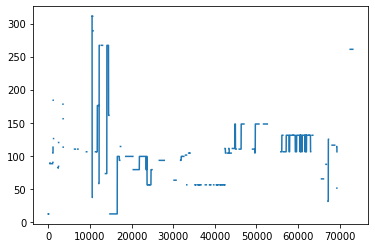

In [66]:
df_train['days_with_fog'].plot()

Top Six facility amount to total > 81.262% of rows
Top Six facility : ['Multifamily_Uncategorized', 'Office_Uncategorized', 'Education_Other_classroom', 'Lodging_Hotel', '2to4_Unit_Building', 'Commercial_Other']


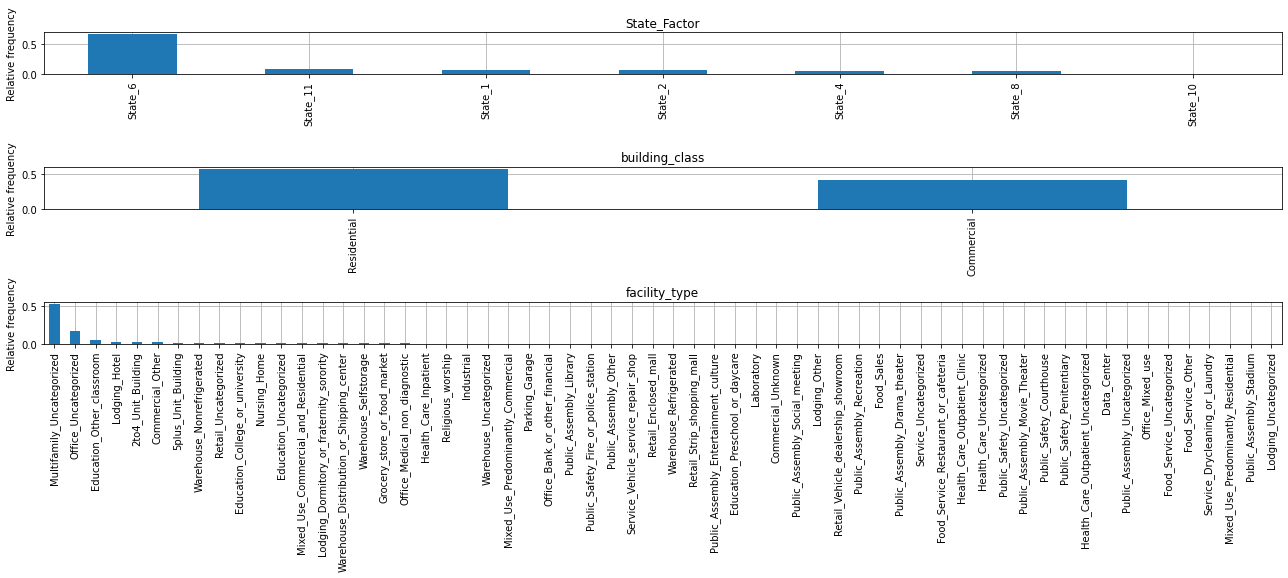

In [67]:
def plot_distbn(column, column_name, num):
    plt.subplot(num)
    column.value_counts(normalize=True).plot(kind='bar')
    plt.title(column_name)
    plt.ylabel('Relative frequency')
    plt.tight_layout()
    plt.grid(True)
    
    return column.value_counts(normalize=True)

plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(18,8))
rel_freqs1 = plot_distbn(df_train['State_Factor'], 'State_Factor', 311)
rel_freqs2 = plot_distbn(df_train['building_class'], 'building_class', 312)
rel_freqs3 = plot_distbn(df_train['facility_type'], 'facility_type', 313)

print(f"Top Six facility amount to total > {round(sum(rel_freqs3[:6])*100, 3)}% of rows")
significant = rel_freqs3.index[:6].tolist()
print(f"Top Six facility : {significant}")

In [68]:
print(f"Top Six facility amount to total > {round(sum(rel_freqs3[:6])*100, 3)}% of rows")
significant = rel_freqs3.index[:6].tolist()
print(f"Top Six facility : {significant}")
df_train = df_train.assign(facility_type_1=np.where(df_train['facility_type'].isin(significant), df_train['facility_type'], 'Others'))
df_test = df_test.assign(facility_type_1=np.where(df_test['facility_type'].isin(significant), df_test['facility_type'], 'Others'))



Top Six facility amount to total > 81.262% of rows
Top Six facility : ['Multifamily_Uncategorized', 'Office_Uncategorized', 'Education_Other_classroom', 'Lodging_Hotel', '2to4_Unit_Building', 'Commercial_Other']


In [69]:
print(df_train[['facility_type', 'facility_type_1']].value_counts())

facility_type                              facility_type_1          
Multifamily_Uncategorized                  Multifamily_Uncategorized    39455
Office_Uncategorized                       Office_Uncategorized         12512
Education_Other_classroom                  Education_Other_classroom     3860
Lodging_Hotel                              Lodging_Hotel                 2098
2to4_Unit_Building                         2to4_Unit_Building            1893
Commercial_Other                           Commercial_Other              1744
5plus_Unit_Building                        Others                        1273
Warehouse_Nonrefrigerated                  Others                        1255
Retail_Uncategorized                       Others                        1130
Education_College_or_university            Others                        1056
Nursing_Home                               Others                         772
Education_Uncategorized                    Others                        

# Preprocessing

In [70]:
df_train['year_built']=df_train['year_built'].fillna(df_train['year_built'].mean())
df_test['year_built']=df_test['year_built'].fillna(df_train['year_built'].mean())

df_train['energy_star_rating']=df_train['energy_star_rating'].fillna(df_train['energy_star_rating'].mean())
df_test['energy_star_rating']=df_test['energy_star_rating'].fillna(df_train['energy_star_rating'].mean())

In [71]:
def building_class_group(d):
    if (d['building_class'] == 'Residential'):
        return 'Residential'
    elif (d['facility_type'] in ('Data_Center', 'Laboratory', 'Grocery_store_or_food_market', 'Health_Care_Inpatient', 'Health_Care_Uncategorized', 'Health_Care_Outpatient_Uncategorized', 'Food_Service_Restaurant_or_cafeteria')):
        return 'Commercial_24_7'
    else:
        return 'Commercial_others'

df_train['building_class_group'] = df_train.apply(building_class_group, axis=1)
df_test['building_class_group'] = df_test.apply(building_class_group, axis=1)
df_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,facility_type_1,building_class_group
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.400391,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.625000,0,Others,Commercial_24_7
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.799805,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500000,1,Others,Commercial_others
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.799805,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.687500,2,Others,Commercial_others
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.799805,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406250,3,Education_Other_classroom,Commercial_others
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.400391,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.898438,4,Others,Commercial_others


In [72]:
df_train[['building_class', 'building_class_group']].value_counts()

building_class  building_class_group
Residential     Residential             43558
Commercial      Commercial_others       31057
                Commercial_24_7          1142
dtype: int64

### Average Quarterly Temp features

In [75]:

def quarter_agg_tempfields(newData:pd.DataFrame, colFlag:str='avg', dropcols:bool=True)-> pd.DataFrame:
    newData[f'winter_{colFlag}_temp'] = (newData[f'december_{colFlag}_temp'] + newData[f'january_{colFlag}_temp'] + newData[f'february_{colFlag}_temp'])/3
    newData[f'spring_{colFlag}_temp'] = (newData[f'march_{colFlag}_temp'] + newData[f'april_{colFlag}_temp'] + newData[f'may_{colFlag}_temp'])/3
    newData[f'summer_{colFlag}_temp'] = (newData[f'june_{colFlag}_temp'] + newData[f'july_{colFlag}_temp'] + newData[f'august_{colFlag}_temp'])/3
    newData[f'fall_{colFlag}_temp'] = (newData[f'september_{colFlag}_temp'] + newData[f'october_{colFlag}_temp'] + newData[f'november_{colFlag}_temp'])/3
    if dropcols:
        newData = newData.drop([f'january_{colFlag}_temp',f'february_{colFlag}_temp',f'march_{colFlag}_temp',f'april_{colFlag}_temp',f'may_{colFlag}_temp',f'june_{colFlag}_temp',f'july_{colFlag}_temp',f'august_{colFlag}_temp',f'september_{colFlag}_temp',f'october_{colFlag}_temp',f'november_{colFlag}_temp',f'december_{colFlag}_temp'] , axis = 1)
    return newData
df_train = quarter_agg_tempfields(df_train, colFlag='avg', dropcols=False)
df_test = quarter_agg_tempfields(df_test, colFlag='avg', dropcols=False)
df_train = quarter_agg_tempfields(df_train, colFlag='min', dropcols=False)
df_test = quarter_agg_tempfields(df_test, colFlag='min', dropcols=False)
df_train = quarter_agg_tempfields(df_train, colFlag='max', dropcols=False)
df_test = quarter_agg_tempfields(df_test, colFlag='max', dropcols=False)

In [87]:
def missing_val_treat_wind_features(data:pd.DataFrame)->pd.DataFrame:
    data["energy_star_rating"] = data.groupby(["State_Factor","Year_Factor"])["energy_star_rating"].apply(lambda x: x.fillna(x.mean()))
    # data["energy_star_rating"] = data.groupby(["State_Factor","Year_Factor"])["energy_star_rating"].apply(lambda x: x.fillna(x.median()))
    data["max_wind_speed"] = data.groupby(["State_Factor","Year_Factor"])["max_wind_speed"].apply(lambda x: x.fillna(x.mean()))
    data["days_with_fog"] = data.groupby(["State_Factor","Year_Factor"])["days_with_fog"].apply(lambda x: x.fillna(x.mean()))
    data["direction_max_wind_speed"] = data.groupby(["Year_Factor"])["direction_max_wind_speed"].apply(lambda x: x.fillna(x.mode()[0]))
    data["direction_peak_wind_speed"] = data.groupby(["Year_Factor"])["direction_peak_wind_speed"].apply(lambda x: x.fillna(x.mode()[0]))
    data["max_wind_speed"] = data.groupby(["Year_Factor"])["max_wind_speed"].apply(lambda x: x.fillna(x.mean()))
    data["days_with_fog"] = data.groupby(["Year_Factor"])["days_with_fog"].apply(lambda x: x.fillna(x.mean()))
    return data

### Missing Value Treatment

In [88]:
df_train = missing_val_treat_wind_features(df_train)
df_test = missing_val_treat_wind_features(df_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/nanops.py:147: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)


In [ ]:
# from sklearn.impute import SimpleImputer
# features = df_train.drop(['site_eui'],axis =1)
# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# imputer.fit(features)
# features = imputer.transform(features)
# df_test = imputer.transform(df_test)

## Baseline lgb model

In [23]:
def entrena_lgb(data,test,features,categorical,target):

    kfold=GroupKFold(n_splits=6)


    i=1

    r=[]
    
    pred_test=np.zeros(len(test))

    importancias=pd.DataFrame()

    importancias['variable']=features
    
    
    cat_ind=[features.index(x) for x in categorical if x in features]
    
    dict_cat={}
    
    categorical_numerical = data[categorical].dropna().select_dtypes(include=np.number).columns.tolist()
    
    categorical_transform=[x for x in categorical if x not in categorical_numerical]
    
    for l in categorical_transform:
        le = preprocessing.LabelEncoder()
        le.fit(list(data[l].dropna())+list(test[l].dropna()))

        dict_cat[l]=le

        data.loc[~data[l].isnull(),l]=le.transform(data.loc[~data[l].isnull(),l])
        test.loc[~test[l].isnull(),l]=le.transform(test.loc[~test[l].isnull(),l])
        
        

    for train_index,test_index in kfold.split(data,data[target],data['Year_Factor']):

        lgb_data_train = lgb.Dataset(data.loc[train_index,features].values,data.loc[train_index,target].values)
        lgb_data_eval = lgb.Dataset(data.loc[test_index,features].values,data.loc[test_index,target].values, reference=lgb_data_train)

        # params = {
        #     'task': 'train',
        #     'boosting_type': 'gbdt',
        #     'objective': 'regression',
        #     'metric': { 'rmse'},
        #     "max_depth":-1,
        #     "num_leaves":32,
        #     'learning_rate': 0.1,
        # "min_child_samples": 100,
        #     'feature_fraction': 0.9,
        #  "bagging_freq":1,
        #     'bagging_fraction': 0.9,
        #     "lambda_l1":10,
        #     "lambda_l2":10,
        #    # "scale_pos_weight":30,
        #     'min_data_per_group':500,

        #     'verbose': 1    
        # }




        # modelo = lgb.train(params,lgb_data_train,num_boost_round=13100,valid_sets=lgb_data_eval,early_stopping_rounds=50,verbose_eval=25,categorical_feature=cat_ind)
        params = {
            'task': 'train',
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': { 'rmse'},
            #'num_iterations':5000,
            #'max_bin':5395,
            "max_depth":12,
            "num_leaves":52,
            # 'learning_rate': 0.873791759,
            'learning_rate': 0.5,
        #"min_child_samples": 100,
            #'feature_fraction': 0.9,
         #"bagging_freq":1,
            #'bagging_fraction': 0.9,
            #"lambda_l1":10,
            #"lambda_l2":10,
           # "scale_pos_weight":30,
            #'min_data_per_group':500,

            'verbose': 1    
        }

        modelo = lgb.train(params, lgb_data_train, num_boost_round=95100, valid_sets=lgb_data_eval, early_stopping_rounds=100, verbose_eval=25, categorical_feature=cat_ind)

        importancias['gain_'+str(i)]=modelo.feature_importance(importance_type="gain")


        data.loc[test_index,'estimator']=modelo.predict(data.loc[test_index,features].values, num_iteration=modelo.best_iteration)
        
        pred_test=pred_test+modelo.predict(test[features].values, num_iteration=modelo.best_iteration)

        print ("Fold_"+str(i))
        a= (mean_squared_error(data.loc[test_index,target],data.loc[test_index,'estimator']))**0.5
        r.append(a)
        print (a)
        print ("")

        i=i+1
        
    for l in categorical_transform:

            data.loc[~data[l].isnull(),l]=dict_cat[l].inverse_transform(data.loc[~data[l].isnull(),l].astype(int))
            
            test.loc[~test[l].isnull(),l]=dict_cat[l].inverse_transform(test.loc[~test[l].isnull(),l].astype(int))
            
    importancias["gain_avg"]=importancias[["gain_1","gain_2","gain_3","gain_4","gain_5"]].mean(axis=1)
    importancias=importancias.sort_values("gain_avg",ascending=False).reset_index(drop=True)
    
    pred_test=(pred_test/6)
    
    
    oof=(mean_squared_error(data[target],data['estimator']))**0.5
    
    print (oof)
    print ("mean: "+str(np.mean(np.array(r))))
    print ("std: "+str(np.std(np.array(r))))
    
    dict_resultados={}
    
    dict_resultados['importancias']=importancias
    
    dict_resultados['predicciones']=pred_test
    
    
    
    return dict_resultados

In [24]:
no_usar=['site_eui','id']

target='site_eui'

categorical=['Year_Factor','State_Factor','building_class','facility_type']

features=[x for x in df_train.columns if x not in no_usar]



### train 1

In [25]:
dict_resultados=entrena_lgb(data=df_train,test=df_test,features=features,categorical=categorical,target=target)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[25]	valid_0's rmse: 51.1503
[50]	valid_0's rmse: 53.7623
[75]	valid_0's rmse: 53.5591
[100]	valid_0's rmse: 53.329
Early stopping, best iteration is:
[3]	valid_0's rmse: 43.3751
Fold_1
43.375140473525285



/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[25]	valid_0's rmse: 38.5616
[50]	valid_0's rmse: 40.4739
[75]	valid_0's rmse: 40.38
[100]	valid_0's rmse: 40.2966
[125]	valid_0's rmse: 40.7394
Early stopping, best iteration is:
[27]	valid_0's rmse: 38.5027
Fold_2
38.50267679165249



/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[25]	valid_0's rmse: 41.6794
[50]	valid_0's rmse: 41.1182
[75]	valid_0's rmse: 40.8041
[100]	valid_0's rmse: 40.6621
[125]	valid_0's rmse: 40.4831
[150]	valid_0's rmse: 40.3931
[175]	valid_0's rmse: 40.4575
[200]	valid_0's rmse: 40.5057
[225]	valid_0's rmse: 40.4696
Early stopping, best iteration is:
[139]	valid_0's rmse: 40.3379
Fold_3
40.33789241423148



/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 3]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


KeyboardInterrupt: ignored

In [ ]:

dict_resultados['importancias']

In [ ]:
dict_resultados['importancias']['variable'].tolist()

In [ ]:
temp=dict_resultados['importancias']

features_selected=temp['variable'].tolist()[0:4]



### train 2

In [ ]:
dict_resultados_2=entrena_lgb(data=df_train,test=df_test,features=features_selected,categorical=categorical,target=target)

In [ ]:
dict_resultados_2['importancias']

In [ ]:
df_train.groupby([ 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION']).size()

In [ ]:
df_train.groupby([ 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION']).size().value_counts()

In [ ]:
df_train.groupby([ 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built',  'ELEVATION']).size().value_counts()

In [ ]:

features_selected_2=list(features_selected)

features_selected_2.extend(['State_Factor'])

### train 3

In [ ]:
dict_resultados_3=entrena_lgb(data=df_train,test=df_test,features=features_selected_2,categorical=categorical,target=target)

In [ ]:
features_selected_2

In [32]:

variables=['facility_type',
 'energy_star_rating',
 'year_built',
# 'floor_area',
 'State_Factor']

df_train['combination_variables']=df_train[variables].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

df_test['combination_variables']=df_test[variables].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [33]:
df_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,facility_type_1,combination_variables
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.400391,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.625000,0,Others,Grocery_store_or_food_market_11.0_1942.0_State_1
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.799805,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500000,1,Others,Warehouse_Distribution_or_Shipping_center_45.0...
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.799805,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.687500,2,Others,Retail_Enclosed_mall_97.0_1951.0_State_1
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.799805,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406250,3,Education_Other_classroom,Education_Other_classroom_46.0_1980.0_State_1
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.400391,36,50.5,68,35,50.59375,73,40,53.6875,80,41,55.5,78,46,56.84375,84,50,60.5,90,52,62.71875,84,52,62.15625,85,52,64.625,90,47,63.03125,83,43,53.8125,72,36,49.28125,71,115,2960,16.59375,0.0,0,56.96875,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.898438,4,Others,Warehouse_Nonrefrigerated_100.0_1985.0_State_1


In [ ]:
features_selected_3=list(features_selected_2)

features_selected_3.extend(['combination_variables'])

categorical.extend(['combination_variables'])

### train 4

In [ ]:
dict_resultados_4=entrena_lgb(data=df_train,test=df_test,features=features_selected_3,categorical=categorical,target=target)

In [ ]:
dict_resultados_4['importancias']

In [ ]:
# df_test['site_eui']=(dict_resultados_2['predicciones'].copy()+dict_resultados_3['predicciones'].copy())/2
df_test['site_eui']=(dict_resultados_4['predicciones'].copy()+ dict_resultados_2['predicciones'].copy()+dict_resultados_3['predicciones'].copy())/3

In [ ]:
df_test[['id','site_eui']]

## Submission file

In [ ]:
df_test[['id','site_eui']].to_csv(f'{WORK_FOLDER}/submission.csv',index=False)

# Submit to Kaggle

In [ ]:
# !kaggle competitions submit \
#      widsdatathon2022 \
#     -f {WORK_FOLDER}/submission.csv \
#     -m "First Colab Baseline Attempt"
!kaggle competitions submit \
     widsdatathon2022 \
    -f {WORK_FOLDER}/submission.csv \
    -m "Playing with Existing LGB Solution v1"

100% 230k/230k [00:06<00:00, 37.1kB/s]
Successfully submitted to WiDS Datathon 2022

## Check Score

In [ ]:
!kaggle competitions submissions widsdatathon2022

fileName        date                 description                            status    publicScore  privateScore  
--------------  -------------------  -------------------------------------  --------  -----------  ------------  
submission.csv  2022-02-18 12:33:58  Playing with Existing LGB Solution v1  complete  25.236       None          
submission.csv  2022-02-17 15:54:31  First Colab Baseline Attempt           complete  29.001       None          
